In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import pickle, os, gzip, json, sys, itertools
import seaborn
import statistics
import gzip,json

In [28]:
df = pd.read_csv("/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/summarize_stat_n6.csv",header=None,sep='\t')
new_headers = ['sample', 'method','precision_per_rank']
df = df.iloc[:,[0,2,4]]
df.columns=new_headers

In [135]:
df = pd.read_csv("/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/summarize_stat_all_n.tsv",sep='\t')


In [103]:
sample_tax = pd.read_csv('/home/miaocj/docker_dir/data/cami_download/2018.01.23_11.53.11_sample_0/reads/abundance_lineage.tsv',sep='\t')
read_mapping = pd.read_csv('/home/miaocj/docker_dir/data/cami_download/2018.01.23_11.53.11_sample_0/reads/reads_mapping.tsv',sep='\t')
read_mapping.columns = ['read_id','genome_ID','tax_id','other']
read_tax = pd.merge(read_mapping,sample_tax,how='left',on='genome_ID').iloc[:,[0,8]]
read_tax.columns=['read_id','spe']
read_tax['spe'] = read_tax['spe'].fillna(' ')
read_tax[['genus','species']]= read_tax['spe'].str.split(' ',expand=True,n=1)
read_tax = read_tax.iloc[:,[0,2,3]] 
read_tax.to_csv('/home/miaocj/docker_dir/data/cami_download/2018.01.23_11.53.11_sample_0/reads/read_tax.tsv',sep='\t',index=False)

In [ ]:
## 比较欧式距离和余弦距离 图一
subtitution = {}
preprocess = ['TF','IDF','TF-IDF','None']
target_method = []
target_method_in_pic = []
for pre in preprocess:
    target_method.append('Exact_Cosine_None_'+pre)
    target_method_in_pic.append('ENN (Cosine) + '+pre)
    subtitution['Exact_Cosine_None_'+pre] = 'ENN (Cosine) + '+pre
    target_method.append('Exact_Euclidean_None_'+pre)
    target_method_in_pic.append('ENN (Euclidean) + '+pre)
    subtitution['Exact_Euclidean_None_'+pre] = 'ENN (Euclidean) + ' +pre

samples = ['CHM13/HLA/real_cyclone','CHM13/IGK/real_cyclone','CHM13/HLA/real_ONT','CHM13/IGK/real_ONT','ara/chr1_30M/real_ONT','rice/chr1_43M/real_ONT_new','yeast/chr4_1M/real_cyclone']
samples_in_pic =['H1-C','H2-C','H1-O','H2-O','A1-O','R1-O','Y4-C']

method_values = []
for i,method in enumerate(target_method):
    method_values.append([])
    for sample in samples:
        file1 = '/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/'+sample+'/kmer_k16/'+method+'_overlap_sizes.pkl'
        with open(file1,'rb') as f:
            neighbor_overlap_sizes = pickle.load(f)
            nested_list = neighbor_overlap_sizes[:-1][:6]
            flatten_list = list(itertools.chain(*nested_list))
            method_values[i].append((len(flatten_list)-flatten_list.count(0))/len(flatten_list))

def rand_jitter(arr):
    stdev = .01 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev

colors = sns.color_palette("tab10")
plt.rcParams['figure.dpi'] = 400
fig, ax = plt.subplots(figsize=(5,4))
fig.subplots_adjust(wspace=0.3)
ylabel = ['precision_per_rank','overlap_size_mean']
ylabel_in_pic = ['Precision per rank','Average overlap size'] 

for i, method in enumerate(target_method_in_pic):
    y = method_values[i]
    x = rand_jitter([1,2,3,4,5,6,7]).tolist()
    ax.scatter(x, y, color=colors[i], label=method,alpha=0.7)
# ax.spines['left'].set_visible(False)
ax.set_xticks(ticks = [1,2,3,4,5,6,7],labels = samples_in_pic)
#ax.set_xticklabels(samples_in_pic, rotation=45)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
yticks = ax.get_yticks()
ax.set_ylabel('Integral precision')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False)

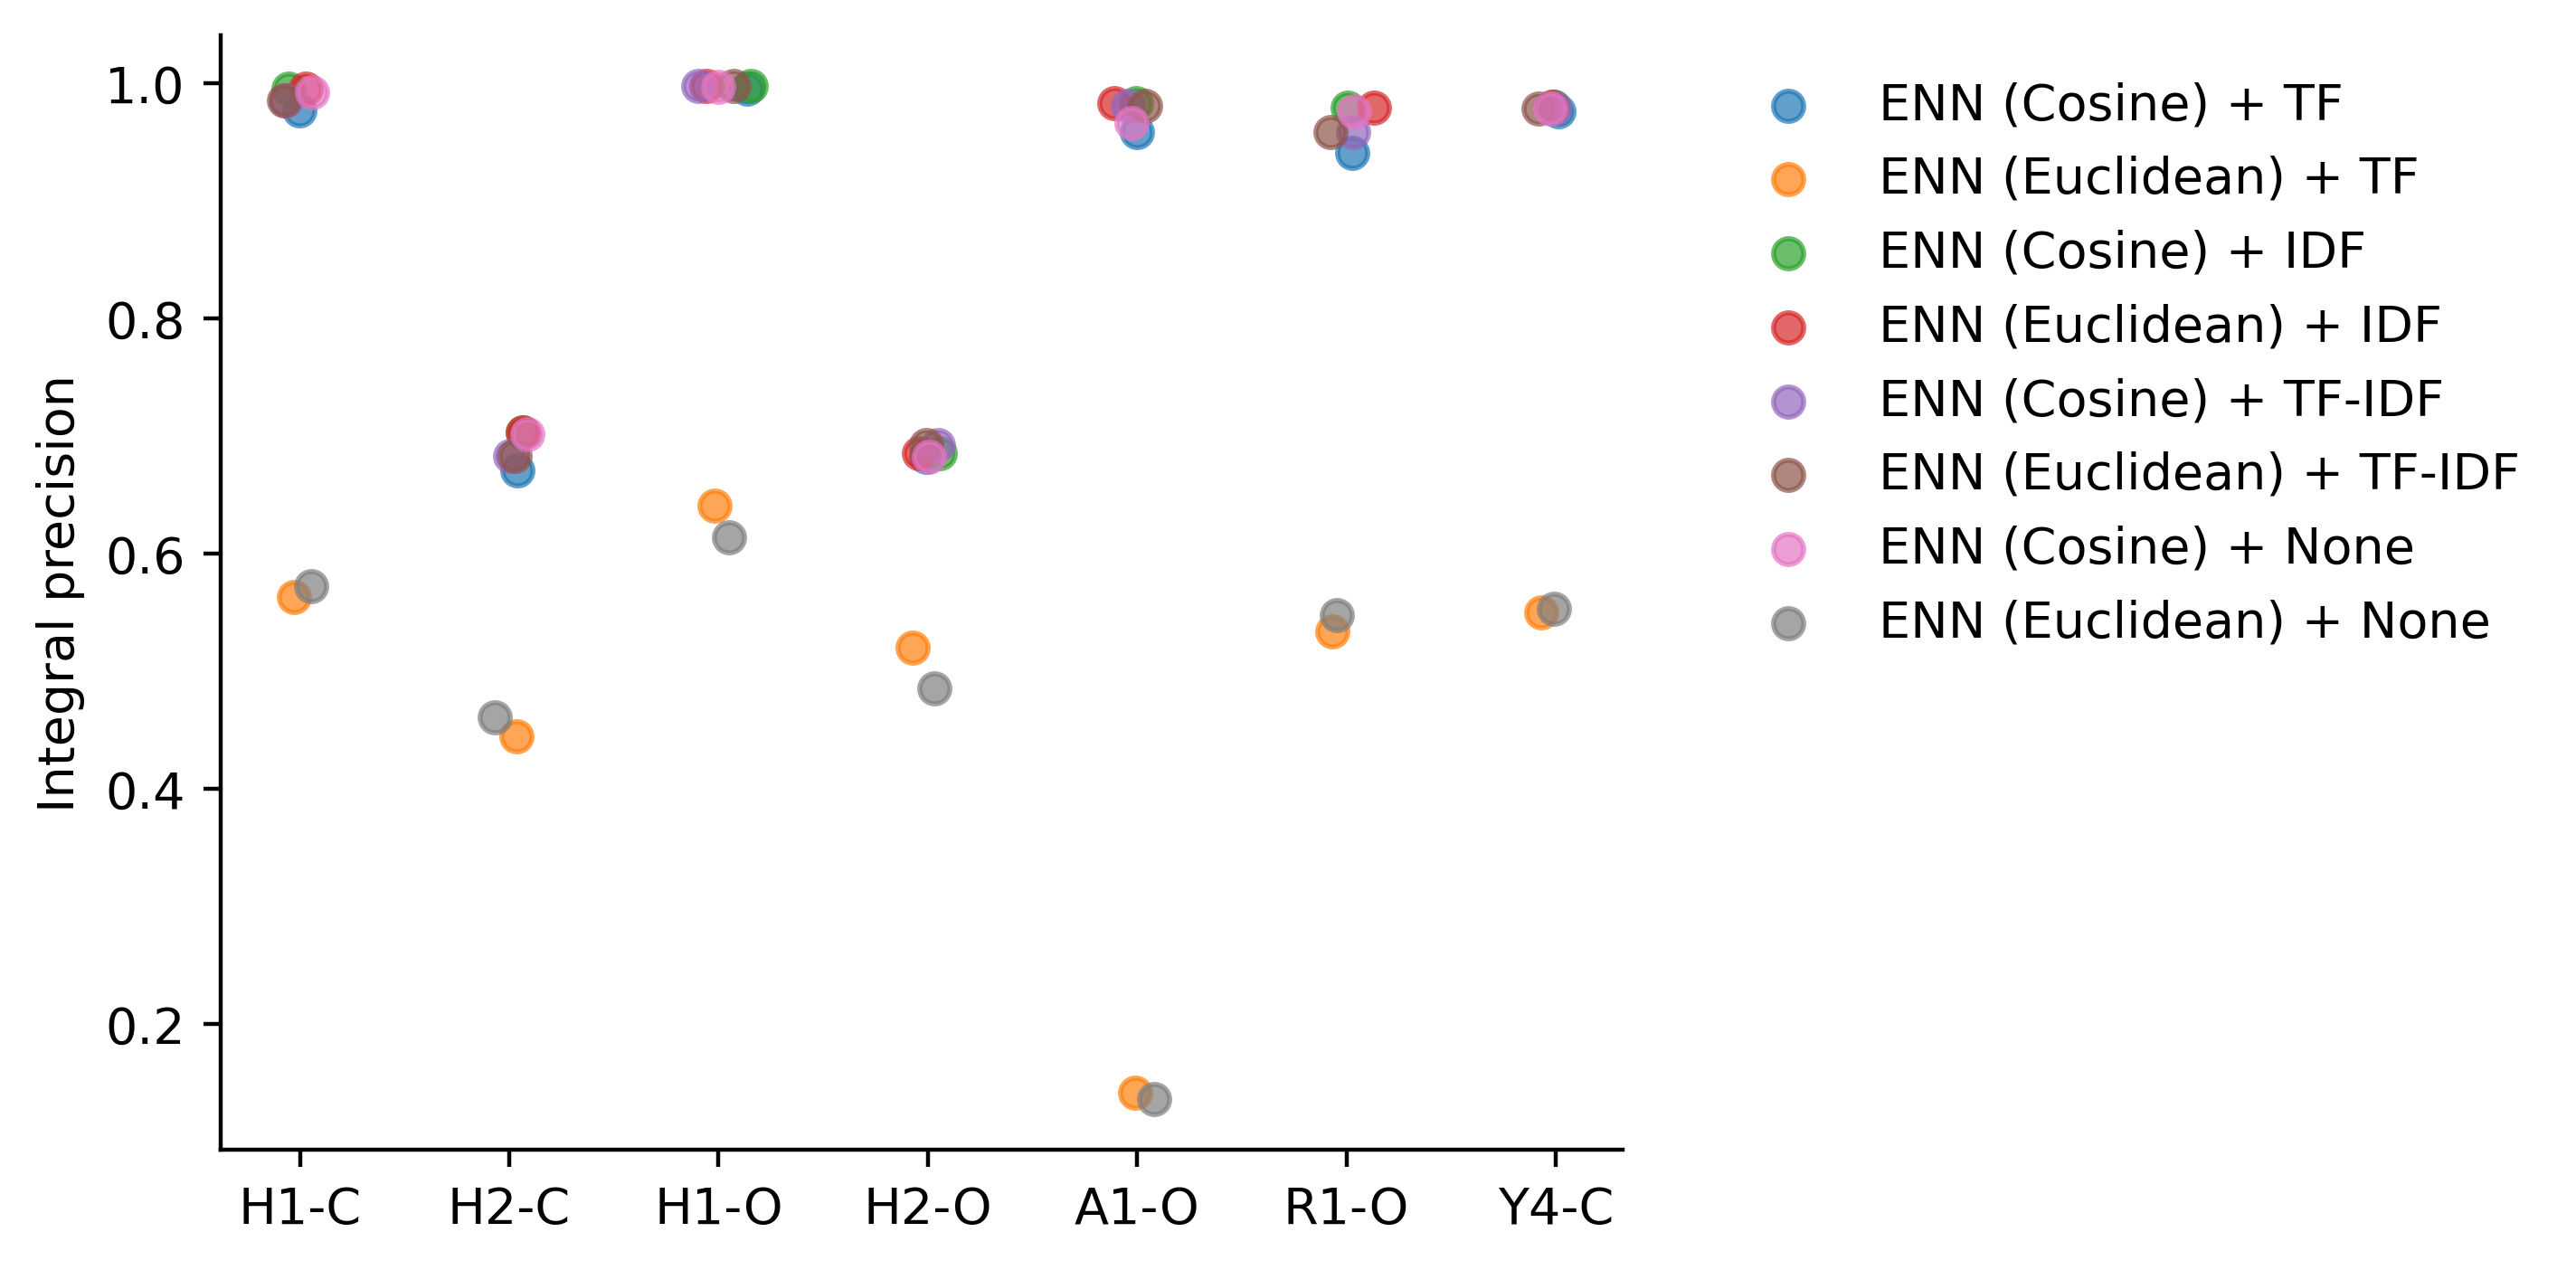

In [51]:
## 比较欧式距离和余弦距离 图一
subtitution = {}
preprocess = ['TF','IDF','TF-IDF','None']
target_method = []
target_method_in_pic = []
for pre in preprocess:
    target_method.append('Exact_Cosine_None_'+pre)
    target_method_in_pic.append('ENN (Cosine) + '+pre)
    subtitution['Exact_Cosine_None_'+pre] = 'ENN (Cosine) + '+pre
    target_method.append('Exact_Euclidean_None_'+pre)
    target_method_in_pic.append('ENN (Euclidean) + '+pre)
    subtitution['Exact_Euclidean_None_'+pre] = 'ENN (Euclidean) + ' +pre

samples = ['CHM13/HLA/real_cyclone','CHM13/IGK/real_cyclone','CHM13/HLA/real_ONT','CHM13/IGK/real_ONT','ara/chr1_30M/real_ONT','rice/chr1_43M/real_ONT_new','yeast/chr4_1M/real_cyclone']
samples_in_pic =['H1-C','H2-C','H1-O','H2-O','A1-O','R1-O','Y4-C']

method_values = []
for i,method in enumerate(target_method):
    method_values.append([])
    for sample in samples:
        file1 = '/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/'+sample+'/kmer_k16/'+method+'_overlap_sizes.pkl'
        with open(file1,'rb') as f:
            neighbor_overlap_sizes = pickle.load(f)
            nested_list = neighbor_overlap_sizes[:-1][:6]
            flatten_list = list(itertools.chain(*nested_list))
            method_values[i].append((len(flatten_list)-flatten_list.count(0))/len(flatten_list))

def rand_jitter(arr):
    stdev = .01 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev

colors = sns.color_palette("tab10")
plt.rcParams['figure.dpi'] = 400
fig, ax = plt.subplots(figsize=(5,4))
fig.subplots_adjust(wspace=0.3)
ylabel = ['precision_per_rank','overlap_size_mean']
ylabel_in_pic = ['Precision per rank','Average overlap size'] 

for i, method in enumerate(target_method_in_pic):
    y = method_values[i]
    x = rand_jitter([1,2,3,4,5,6,7]).tolist()
    ax.scatter(x, y, color=colors[i], label=method,alpha=0.7)
# ax.spines['left'].set_visible(False)
ax.set_xticks(ticks = [1,2,3,4,5,6,7],labels = samples_in_pic)
#ax.set_xticklabels(samples_in_pic, rotation=45)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
yticks = ax.get_yticks()
ax.set_ylabel('Integral precision')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False)

In [ ]:
# #每个样本保存为一个图片
# prefix = 'ENN_Cosine_Euclidean_'
# samples = ['CHM13/HLA/real_cyclone','CHM13/IGK/real_cyclone','CHM13/HLA/real_ONT','CHM13/IGK/real_ONT','ara/chr1_30M/real_ONT','rice/chr1_43M/real_ONT_new','yeast/chr4_1M/real_cyclone']
# samples_in_pic =['H1-C','H2-C','H1-O','H2-O','A1-O','R1-O','Y4-C']

# preprocess = ['TF','IDF','TF-IDF','None']
# target_method = []
# target_method_in_pic = []
# alpha_list = []
# for pre in preprocess:
#     target_method.append('Exact_Cosine_None_'+pre)
#     target_method_in_pic.append('ENN (Cosine) + '+pre)
#     alpha_list.append(0.3)
#     target_method.append('Exact_Euclidean_None_'+pre)
#     target_method_in_pic.append('ENN (Euclidean) + '+pre)
#     alpha_list.append(0.7)

# colors = sns.color_palette("tab10")
# for k,sample in enumerate(samples):
#     print(sample)
#     df = df[df['sample'] == sample]
#     fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10, 4),dpi=300)
#     for i, method in enumerate(target_method):
#         print(method)
#         _df = df[df.method == method]
#         ax1.plot(_df['n_neighbors'] , _df['integral_precision'], label = target_method_in_pic[i],color= colors[i],marker='o',alpha=alpha_list[i])
#         ax2.plot(_df['n_neighbors'] , _df['integral_mean'], label = target_method_in_pic[i],color= colors[i],marker='o',alpha=alpha_list[i])
#     ax1.set_xticks([i for i in df['n_neighbors'] if i%2==0])
#     ax2.set_xticks([i for i in df['n_neighbors'] if i%2==0])
#     ax1.set_xlabel('Neighbor rank')
#     ax1.set_ylabel('Integral precision')
#     ax2.set_ylabel('Integral average overlap size')
#     ax2.set_xlabel('Neighbor rank')
#     fig.subplots_adjust(wspace=0.3)
#     ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False)
#     picture_file_name = prefix + samples_in_pic[k]+ '.pdf'
    #plt.savefig(picture_file_name,dpi=600)

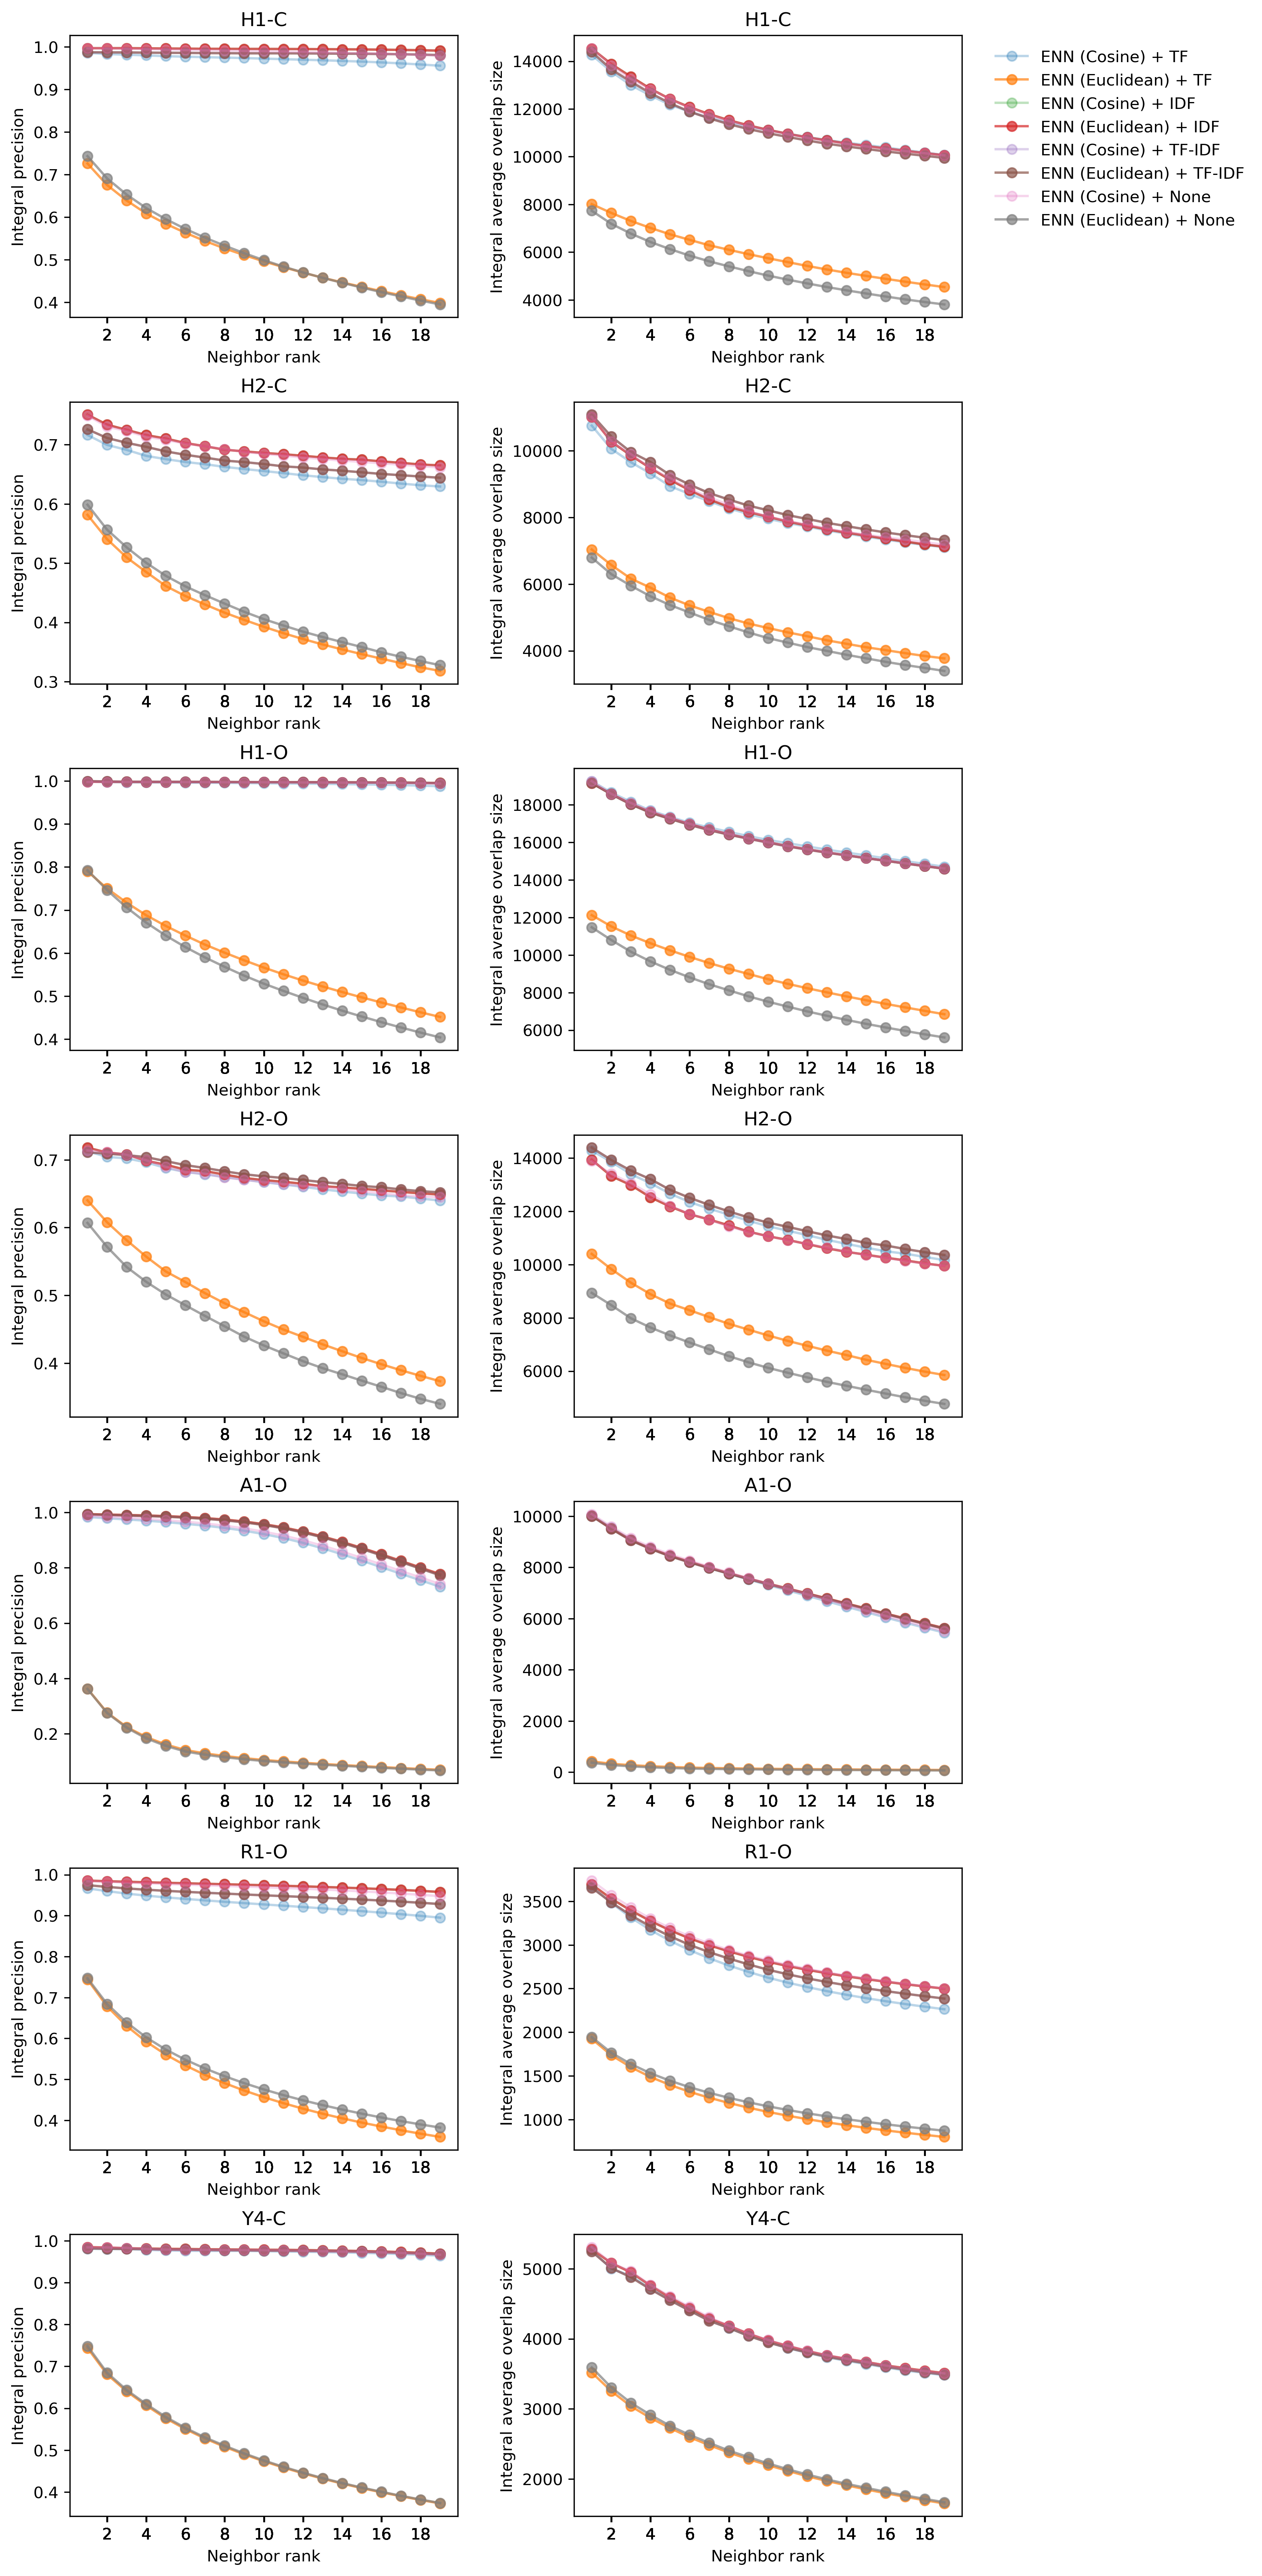

In [137]:
prefix = 'ENN_Cosine_Euclidean_'
samples = ['CHM13/HLA/real_cyclone','CHM13/IGK/real_cyclone','CHM13/HLA/real_ONT','CHM13/IGK/real_ONT','ara/chr1_30M/real_ONT','rice/chr1_43M/real_ONT_new','yeast/chr4_1M/real_cyclone']
samples_in_pic =['H1-C','H2-C','H1-O','H2-O','A1-O','R1-O','Y4-C']

preprocess = ['TF','IDF','TF-IDF','None']
target_method = []
target_method_in_pic = []
alpha_list = []
for pre in preprocess:
    target_method.append('Exact_Cosine_None_'+pre)
    target_method_in_pic.append('ENN (Cosine) + '+pre)
    alpha_list.append(0.3)
    target_method.append('Exact_Euclidean_None_'+pre)
    target_method_in_pic.append('ENN (Euclidean) + '+pre)
    alpha_list.append(0.7)

colors = sns.color_palette("tab10")
fig, axes = plt.subplots(7,2,figsize=(10, 28),dpi=300)
for k,sample in enumerate(samples):
    df1 = df[df['sample'] == sample]
    for i, method in enumerate(target_method):
        df2 = df1[df1.method == method]
        axes[k,0].plot(df2['n_neighbors'] , df2['integral_precision'], label = target_method_in_pic[i],color= colors[i],marker='o',alpha=alpha_list[i])
        axes[k,1].plot(df2['n_neighbors'] , df2['integral_mean'], label = target_method_in_pic[i],color= colors[i],marker='o',alpha=alpha_list[i])
    axes[k,0].set_xticks([i for i in df['n_neighbors'] if i%2==0])
    axes[k,1].set_xticks([i for i in df['n_neighbors'] if i%2==0])
    axes[k,0].set_xlabel('Neighbor rank')
    axes[k,0].set_ylabel('Integral precision')
    axes[k,1].set_ylabel('Integral average overlap size')
    axes[k,1].set_xlabel('Neighbor rank')
    axes[k,0].set_title(samples_in_pic[k])
    axes[k,1].set_title(samples_in_pic[k])
    fig.subplots_adjust(wspace=0.3)
    fig.subplots_adjust(hspace=0.3)
    axes[0,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False)


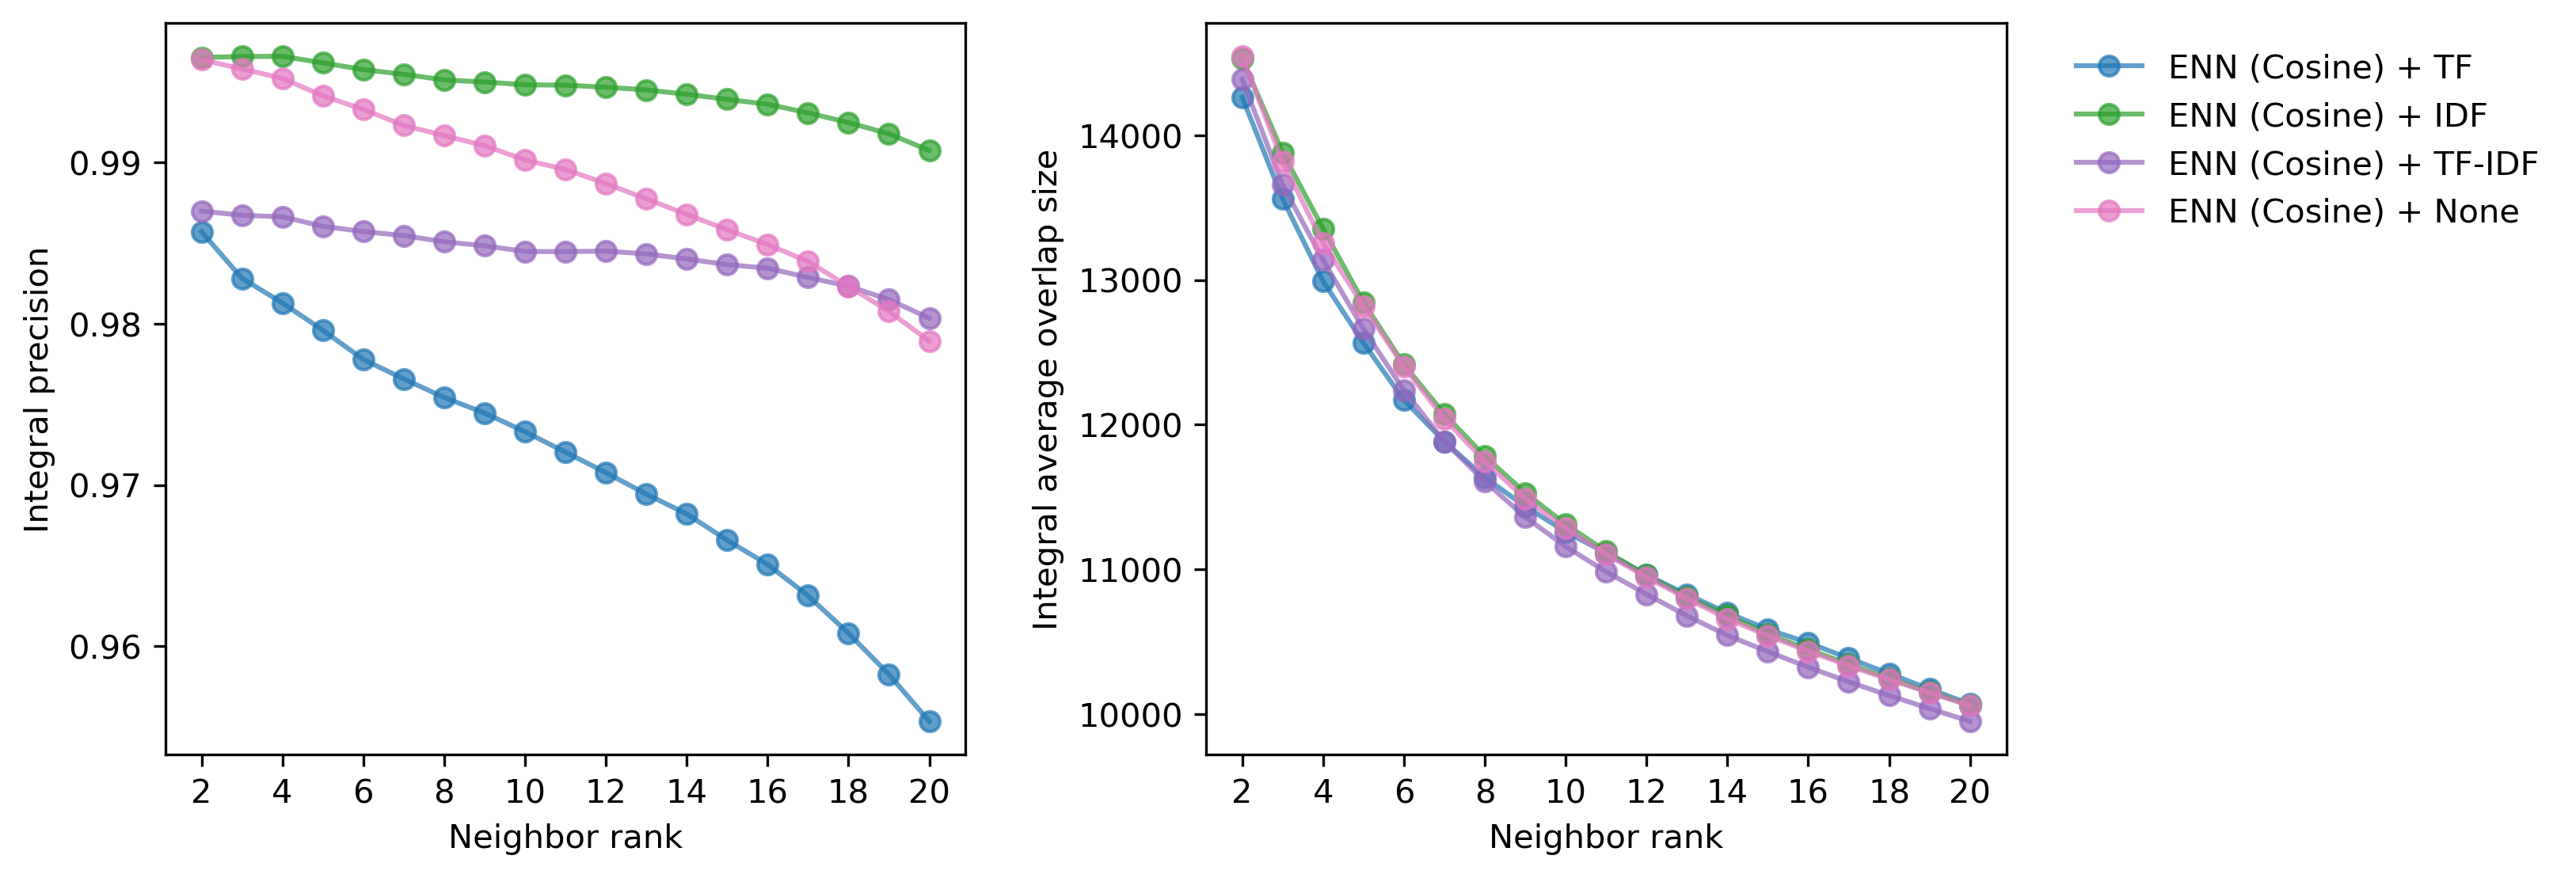

In [47]:
preprocess = ['TF','IDF','TF-IDF','None']
target_method = []
target_method_in_pic = []
alpha_list = []
for pre in preprocess:
    target_method.append('Exact_Cosine_None_'+pre)
    target_method_in_pic.append('ENN (Cosine) + '+pre)
    
all_df1 = []
for method in target_method:
    file2 = '/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/CHM13/HLA/real_cyclone/kmer_k16/'+method+'_overlap_stat.tsv'
    df2 = pd.read_csv(file2,sep='\t')
    df2['neighbor'] = df2['n_neighbors'] -2  
    file1 = '/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/CHM13/HLA/real_cyclone/kmer_k16/'+method+'_overlap_sizes.pkl'
    with open(file1,'rb') as f:      
        neighbor_overlap_sizes = pickle.load(f)
    integral_mean = []
    integral_precision = []
    for i in range(len(neighbor_overlap_sizes[:-1])):
        nested_list = neighbor_overlap_sizes[:-1][:i+1]
        flatten_list = list(itertools.chain(*nested_list))
        integral_precision.append((len(flatten_list)-flatten_list.count(0))/len(flatten_list))
        integral_mean.append(statistics.mean(flatten_list))
    df2['integral_mean'] = integral_mean
    df2['integral_precision'] = integral_precision
    all_df1.append(df2)

colors = sns.color_palette("tab10")
_colors = [colors[i] for i in [0, 2, 4, 6]]
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10, 4),dpi=300)
for i,df in enumerate(all_df1):
    ax1.plot(df['n_neighbors'] , df['integral_precision'], label = target_method_in_pic[i],color= _colors[i],marker='o',alpha=0.7)
    ax2.plot(df['n_neighbors'] , df['integral_mean'], label = target_method_in_pic[i],color= _colors[i],marker='o',alpha=0.7)
ax1.set_xticks([i for i in df['n_neighbors'] if i%2==0])
ax2.set_xticks([i for i in df['n_neighbors'] if i%2==0])
ax1.set_xlabel('Neighbor rank')
ax1.set_ylabel('Integral precision')
ax2.set_ylabel('Integral average overlap size')
ax2.set_xlabel('Neighbor rank')
fig.subplots_adjust(wspace=0.3)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False)

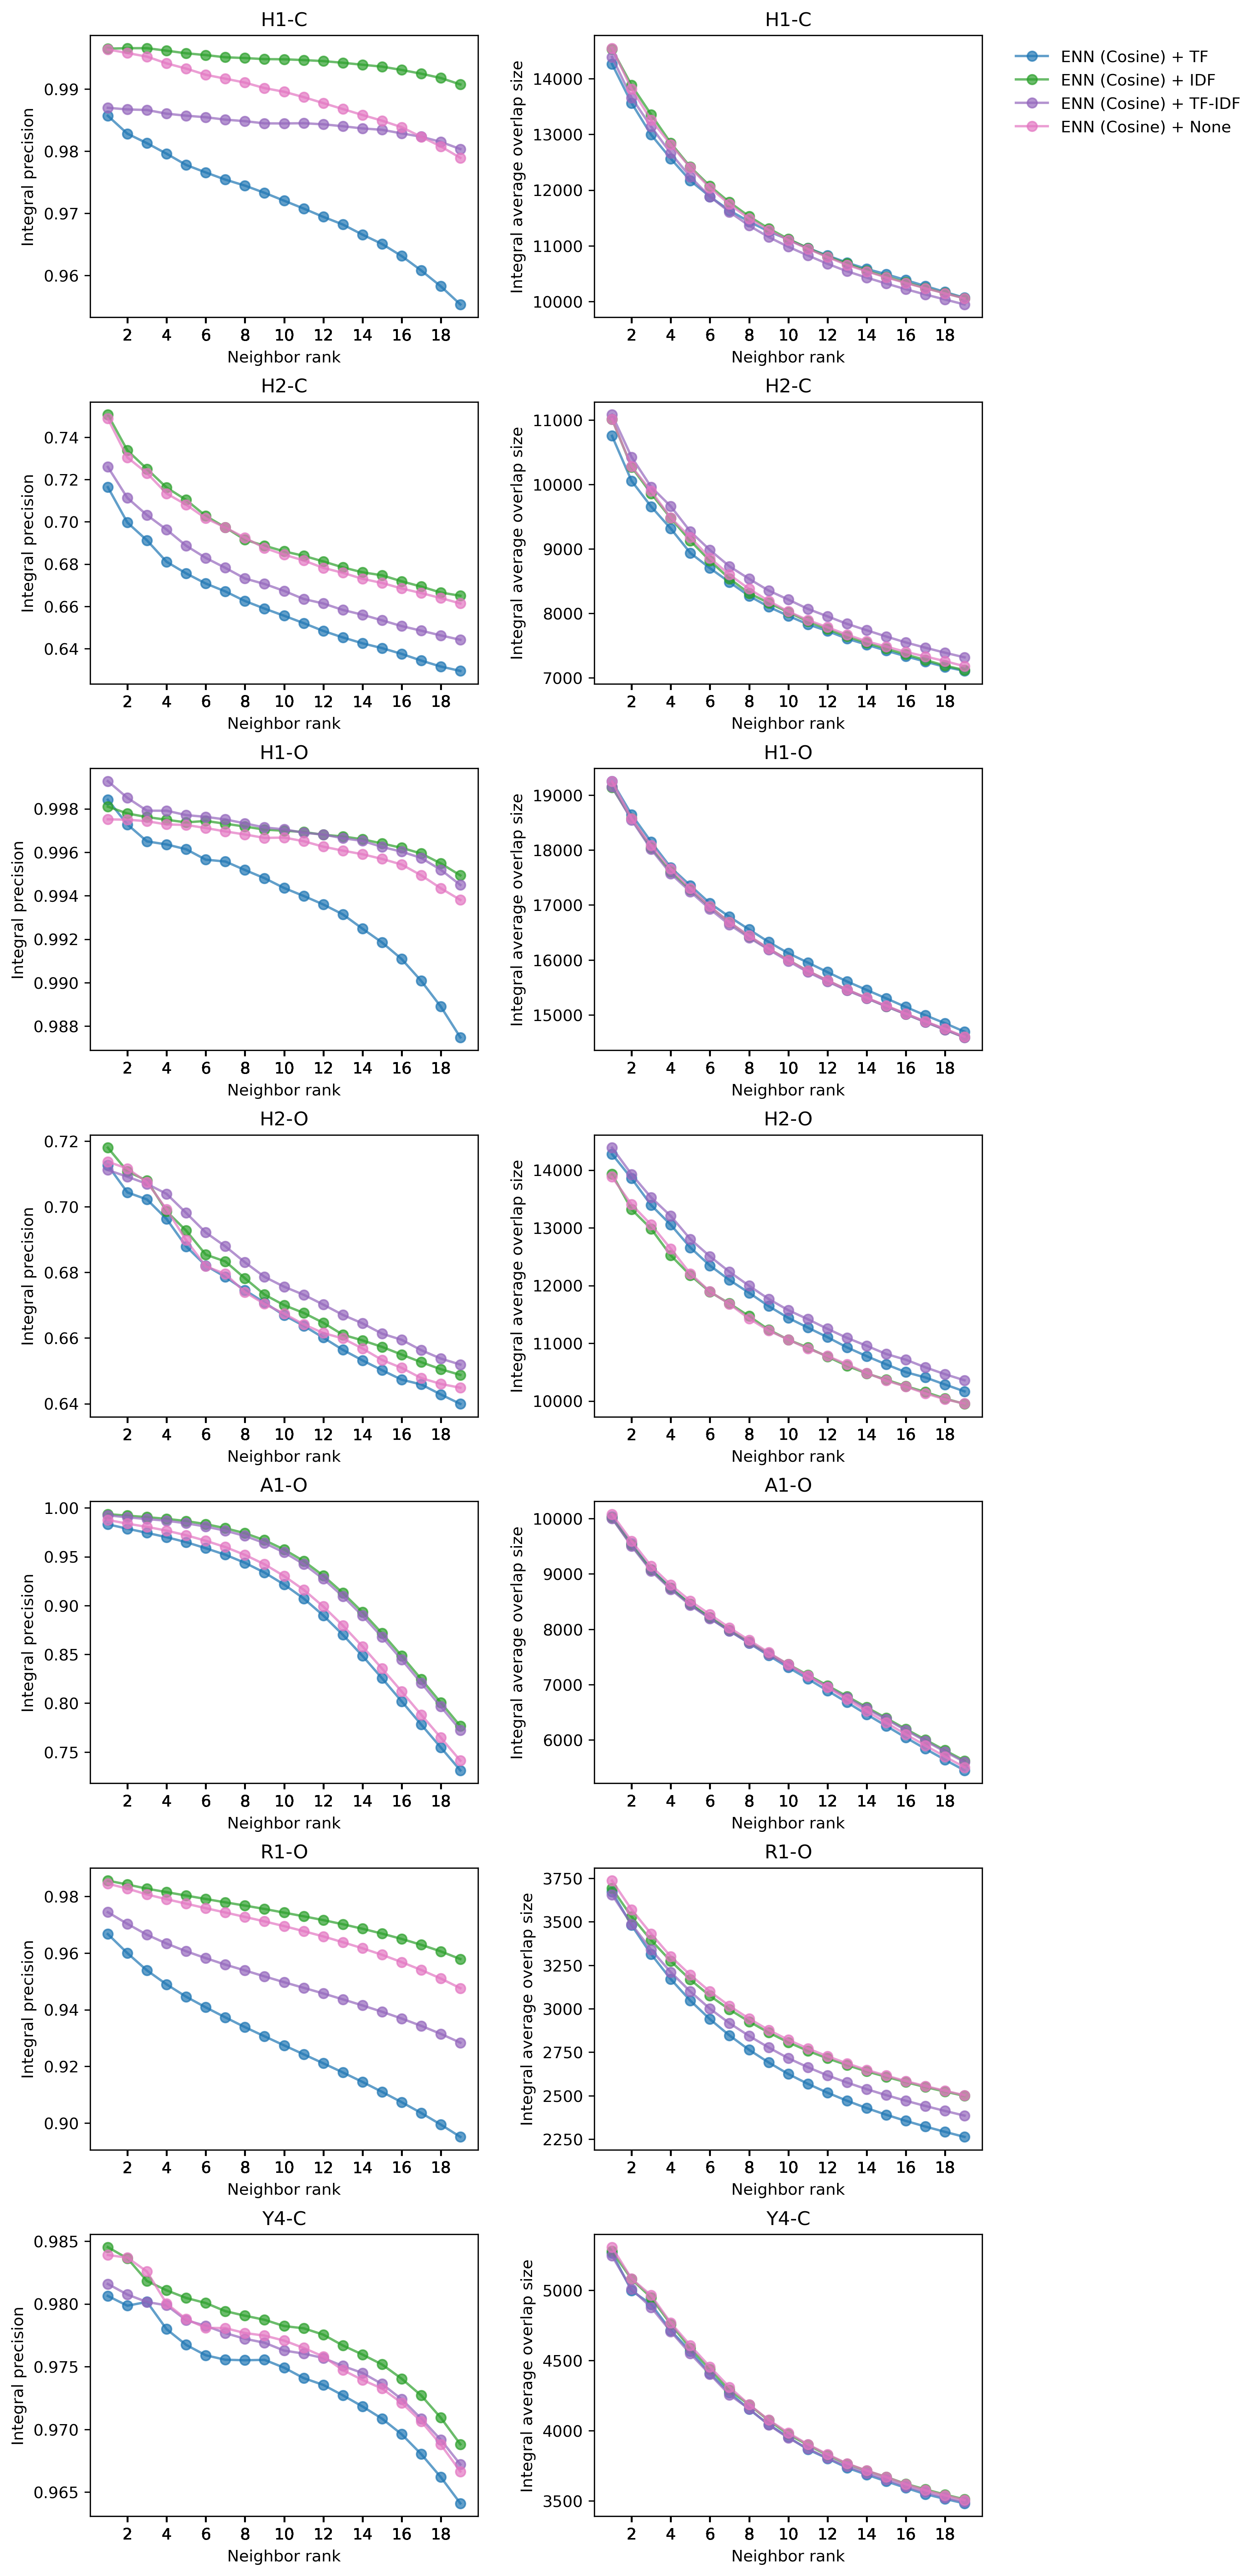

In [139]:
prefix = 'ENN_Cosine_Euclidean_'
samples = ['CHM13/HLA/real_cyclone','CHM13/IGK/real_cyclone','CHM13/HLA/real_ONT','CHM13/IGK/real_ONT','ara/chr1_30M/real_ONT','rice/chr1_43M/real_ONT_new','yeast/chr4_1M/real_cyclone']
samples_in_pic =['H1-C','H2-C','H1-O','H2-O','A1-O','R1-O','Y4-C']

preprocess = ['TF','IDF','TF-IDF','None']
target_method = []
target_method_in_pic = []
alpha_list = []
for pre in preprocess:
    target_method.append('Exact_Cosine_None_'+pre)
    target_method_in_pic.append('ENN (Cosine) + '+pre)
    alpha_list.append(0.7)

colors = sns.color_palette("tab10")
_colors = [colors[i] for i in [0, 2, 4, 6]]
fig, axes = plt.subplots(7,2,figsize=(10, 28),dpi=300)
for k,sample in enumerate(samples):
    df1 = df[df['sample'] == sample]
    for i, method in enumerate(target_method):
        df2 = df1[df1.method == method]
        axes[k,0].plot(df2['n_neighbors'] , df2['integral_precision'], label = target_method_in_pic[i],color= _colors[i],marker='o',alpha=alpha_list[i])
        axes[k,1].plot(df2['n_neighbors'] , df2['integral_mean'], label = target_method_in_pic[i],color= _colors[i],marker='o',alpha=alpha_list[i])
    axes[k,0].set_xticks([i for i in df['n_neighbors'] if i%2==0])
    axes[k,1].set_xticks([i for i in df['n_neighbors'] if i%2==0])
    axes[k,0].set_xlabel('Neighbor rank')
    axes[k,0].set_ylabel('Integral precision')
    axes[k,1].set_ylabel('Integral average overlap size')
    axes[k,1].set_xlabel('Neighbor rank')
    axes[k,0].set_title(samples_in_pic[k])
    axes[k,1].set_title(samples_in_pic[k])
    fig.subplots_adjust(wspace=0.3)
    fig.subplots_adjust(hspace=0.3)
    axes[0,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False)

In [ ]:
##绘制箱型图 precision 
df.columns=new_headers
preprocess = ['TF','IDF','TF-IDF','None']
target_method = []
for pre in preprocess:
    target_method.append('Exact_Cosine_None_'+pre)
    target_method.append('Exact_Euclidean_None_'+pre)
target_df = df[(df.method.isin(target_method))]
target_df[['method', 'preprocess']] = target_df['method'].str.rsplit('_', n=1, expand=True)
colors = sns.color_palette(palette='muted')
fig, ax1 = plt.subplots(figsize=(4, 4))
sns.boxplot(x ='preprocess',ax=ax1,y ='precision_per_rank',data = target_df,color=colors[i]) 
ax1.set_ylabel('Precision')
plt.legend(loc = (0.1,0.15),frameon=False)


In [11]:
target_df[target_df.loc[:,'method']=='HNSW_Cosine_None_IDF'].loc[:,'precision_per_rank'].tolist() 

[0.694940796555436, 0.9760127279402766, 0.9166239096972808]

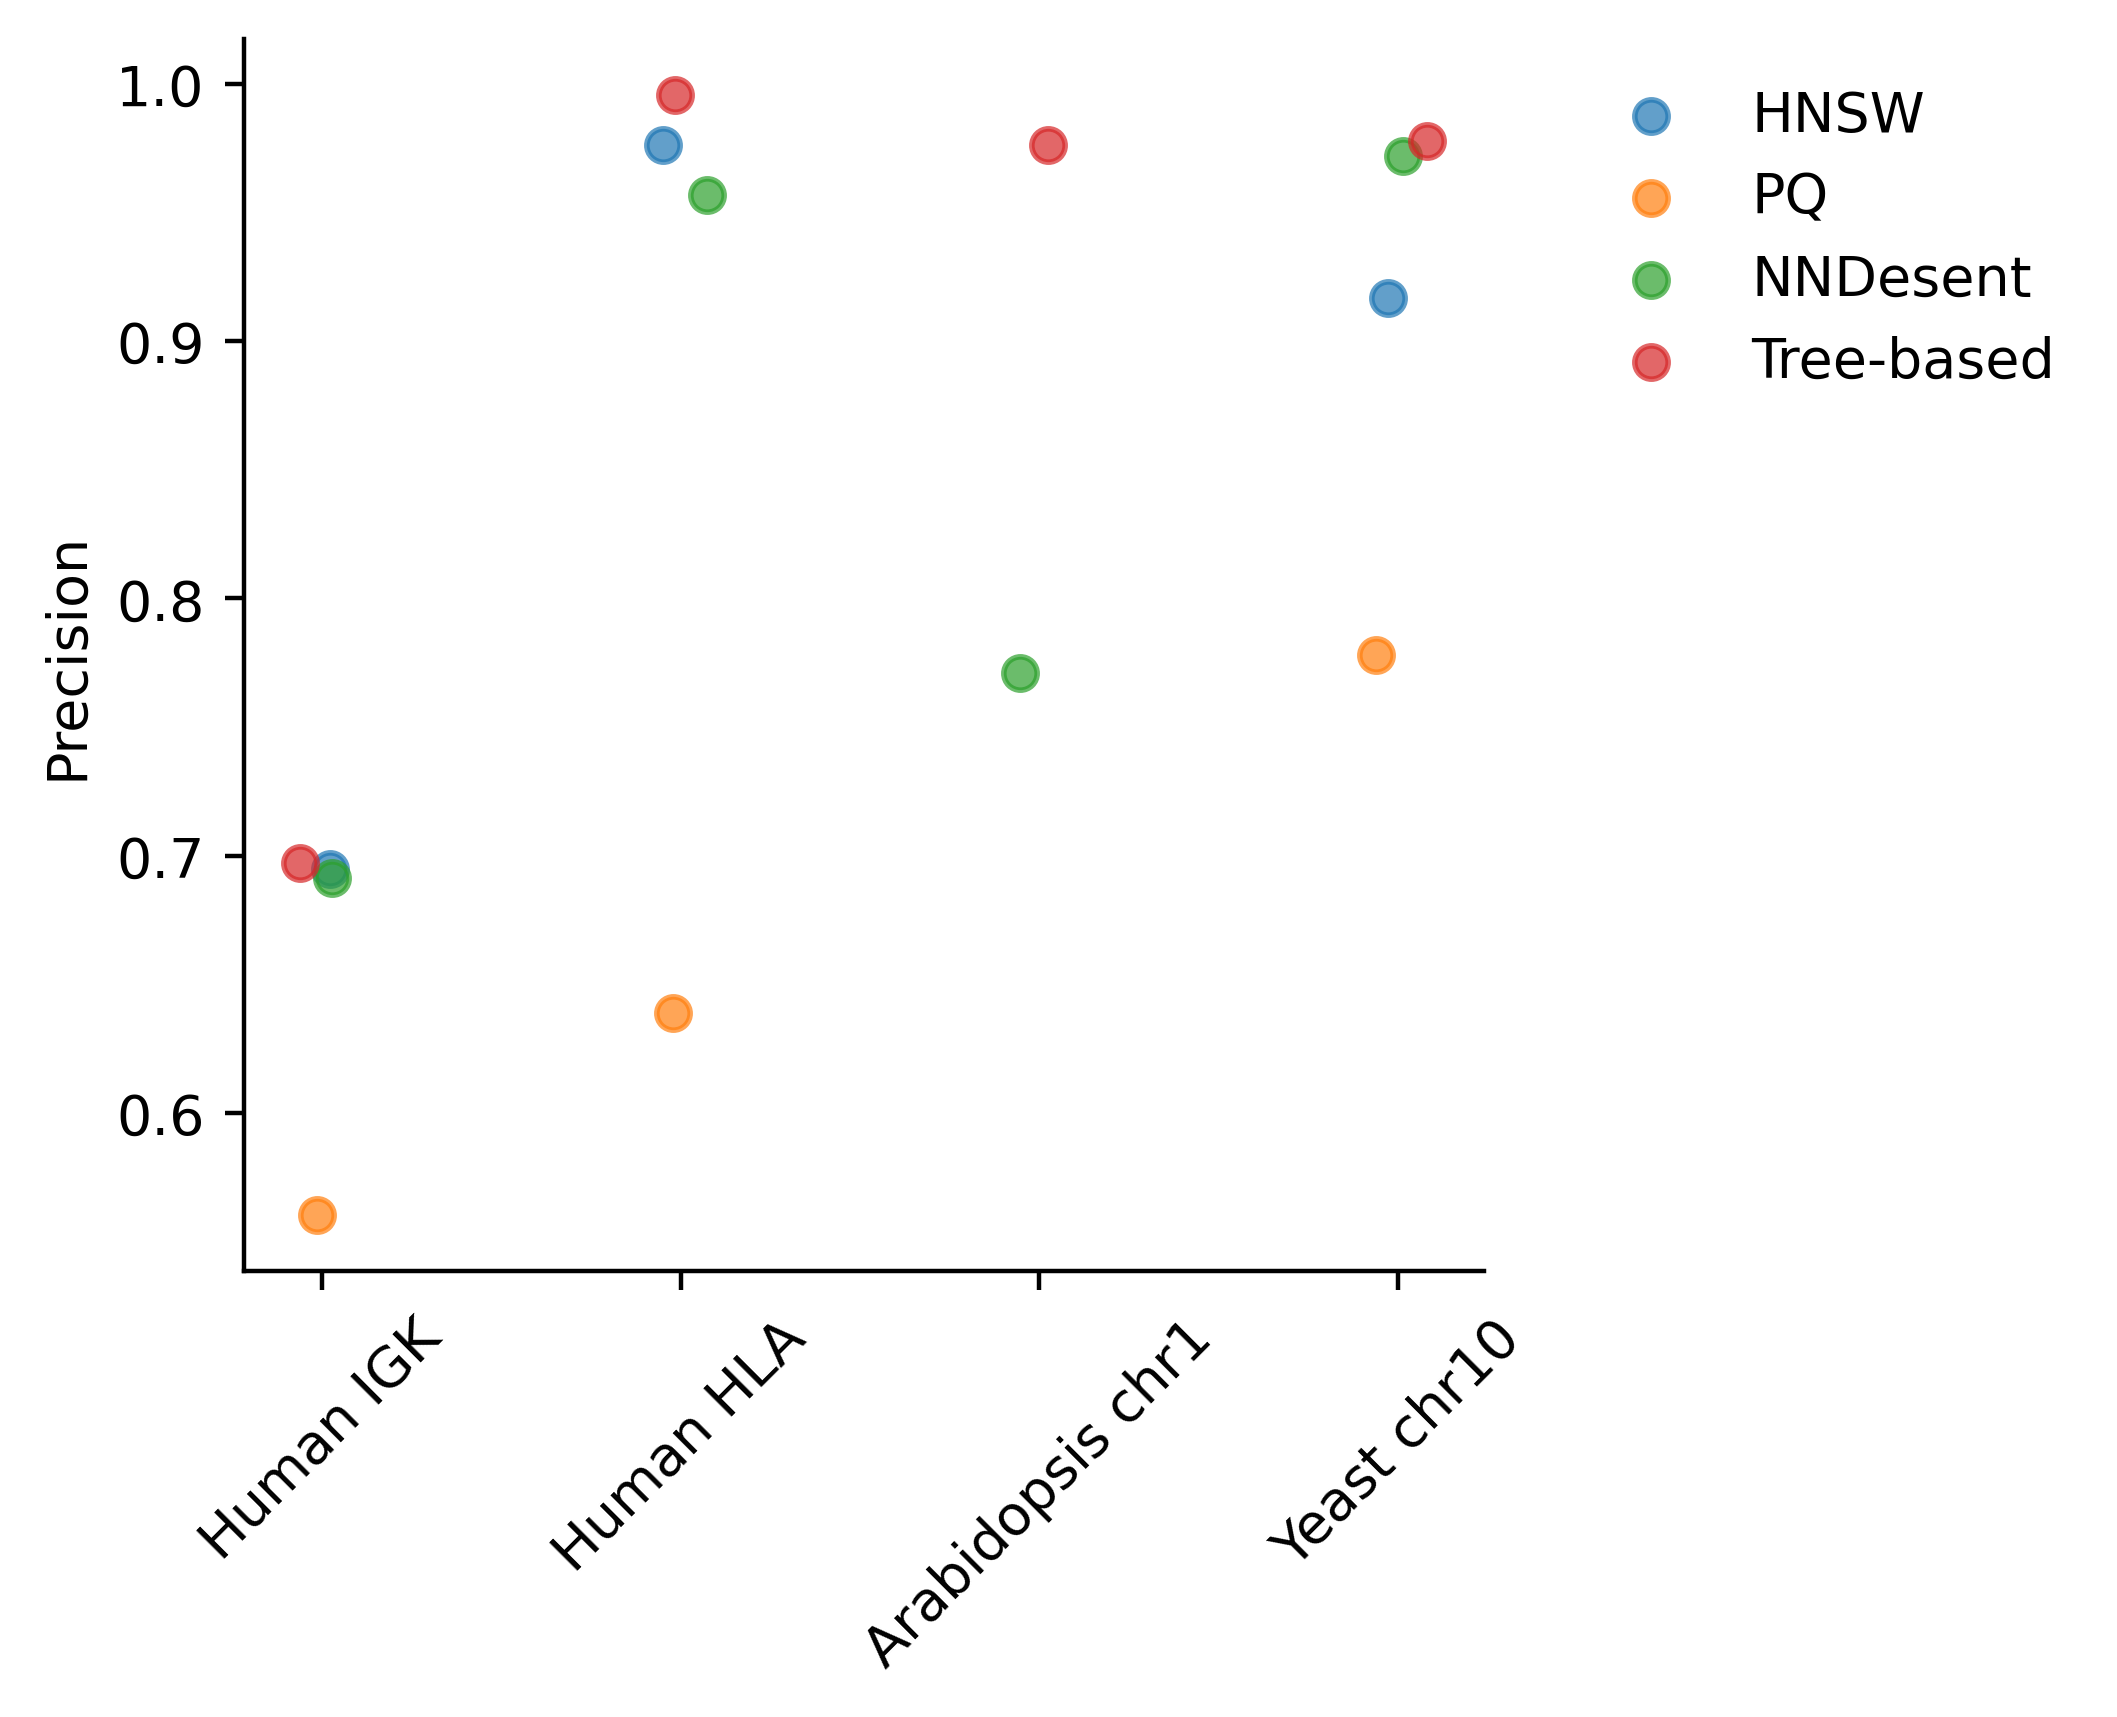

In [29]:
target_method = ['HNSW_Cosine_None_IDF','PQ_Cosine_None_IDF','NNDescent_Cosine_None_IDF','Exact_Cosine_None_IDF']
target_method_in_pic = ['HNSW','PQ','NNDesent','Tree-based']

samples = ['CHM13/HLA/real_cyclone','CHM13/IGK/real_cyclone','ara/chr1_30M/real_ONT','yeast/chr4_1M/real_cyclone']
samples_in_pic =['H1-C','Human HLA','Arabidopsis chr1','Yeast chr10']

samples = ['CHM13/HLA/real_cyclone','CHM13/IGK/real_cyclone','CHM13/HLA/real_ONT','CHM13/IGK/real_ONT','ara/chr1_30M/real_ONT','yeast/chr4_1M/real_cyclone']
samples_in_pic =['H1-C','H2-C','H1-O','H2-O','A1-O','R1-O','Y4-C']

target_df = df[(df['method'].isin(target_method))&(df['sample'].isin(samples))]
def rand_jitter(arr):
    stdev = .02 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev

colors = sns.color_palette("tab10")
plt.rcParams['figure.dpi'] = 400
fig, ax = plt.subplots(figsize=(4,4))
fig.subplots_adjust(wspace=0.3)
ylabel = ['precision_per_rank','overlap_size_mean']
ylabel_in_pic = ['Precision per rank','Average overlap size'] 

for i, method in enumerate(target_method):
    method_values = target_df[target_df.loc[:,'method']==method].loc[:,'precision_per_rank'].tolist()
    if len(method_values) == 3:
        method_values.insert(2,None)
    x = rand_jitter([1,2,3,4]).tolist()
    ax.scatter(x, method_values, color=colors[i], label=target_method_in_pic[i],alpha=0.7)
# ax.spines['left'].set_visible(False)
ax.set_xticks(ticks = [1,2,3,4],labels = samples_in_pic)
ax.set_xticklabels(samples_in_pic, rotation=45)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
yticks = ax.get_yticks()
ax.set_ylabel('Precision')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False)

In [120]:
df

Unnamed: 0                      sample                          method  \
0              0      CHM13/IGK/real_cyclone       HNSW_Cosine_umap_500d_IDF   
1              1      CHM13/IGK/real_cyclone       HNSW_Cosine_umap_500d_IDF   
2              2      CHM13/IGK/real_cyclone       HNSW_Cosine_umap_500d_IDF   
3              3      CHM13/IGK/real_cyclone       HNSW_Cosine_umap_500d_IDF   
4              4      CHM13/IGK/real_cyclone       HNSW_Cosine_umap_500d_IDF   
...          ...                         ...                             ...   
1914        1914  yeast/chr4_1M/real_cyclone  HNSW_Cosine_Spectural_500d_IDF   
1915        1915  yeast/chr4_1M/real_cyclone  HNSW_Cosine_Spectural_500d_IDF   
1916        1916  yeast/chr4_1M/real_cyclone  HNSW_Cosine_Spectural_500d_IDF   
1917        1917  yeast/chr4_1M/real_cyclone  HNSW_Cosine_Spectural_500d_IDF   
1918        1918  yeast/chr4_1M/real_cyclone  HNSW_Cosine_Spectural_500d_IDF   

      n_neighbors  integral_precision  integral_mean  
0               1            0.633940    7027.304100  
1               2            0.629279    7070.764888  
2               3            0.625529    6951.362856  
3               4            0.619184    6857.555508  
4               5            0.613656    6777.254426  
...           ...                 ...            ...  
1914           15            0.804256    3301.324250  
1915           16            0.795245    3234.973009  
1916           17            0.786042    3164.318590  
1917           18            0.778017    3100.116467  
1918           19            0.771223    3037.195897  

[1919 rows x 6 columns]

In [ ]:
dims = ['Spectural_500d','GaussianRP_500d','SparseRP_500d','umap_500d','PCA_500d','scBiMap_500d']
dims_in_pic = ['Spectral','GaussianRP','SparseRP','UMAP','PCA','scBiMapping']
target_method = []
target_method_in_pic = []
for i,dim in enumerate(dims):
    target_method.append('HNSW_Cosine_'+dim+'_IDF')
    target_method_in_pic.append(dims_in_pic[i])
target_df = df[(df.method.isin(target_method))&(df.n_neighbors==6)].sort_values(by=['sample','method'])

samples = ['./CHM13/HLA', './CHM13/IGK','./yeast/chr10', './TAIR/chr3']
samples_in_pic =['Human HLA','Human IGK','Arabidopsis chr3','Yeast chr10']
 
def rand_jitter(arr):
    stdev = .02 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev
colors = sns.color_palette(palette='tab10')
plt.rcParams['figure.dpi'] = 400
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,2))
fig.subplots_adjust(wspace=0.3)
ylabel = ['precision','recall','continuity']

for num,ax in enumerate([ax1,ax2,ax3]):
    for i, method in enumerate(target_method):
        method_values = target_df[target_df['method']==target_method[i]].loc[:,ylabel[num]].tolist()
        if len(method_values) == 3:
            method_values.insert(2,None)
        x = rand_jitter([1,2,3,4]).tolist()
        ax.scatter(x, method_values, color=colors[i], label=target_method_in_pic[i],alpha=0.7)
    # ax.spines['left'].set_visible(False)
    ax.set_xticks(ticks = [1,2,3,4],labels = samples_in_pic)
    ax.set_xticklabels(samples_in_pic, rotation=45)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    yticks = ax.get_yticks()
    # for y in yticks:
    #     ax.axhline(y=y, linestyle='--', color='gray', linewidth=0.8)
    ax.set_ylabel(ylabel_in_pic[num])

# ax1.set_ylim(0.69,1.05)
# ax3.set_ylim(0.9309,1.005)
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False)
plt.savefig('dimension_reduction.pdf',dpi=600)